## Dataset from the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=planets).

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [118]:
path_data = '../misc_datasets/planets.csv'
df_planets = pd.read_csv(path_data)
# df_planets

In [119]:
path_dict = '../misc_datasets/planets_data_dict.csv'
df_planets_data_dict = pd.read_csv(path_dict)
# df_planets_data_dict

In [120]:
planet_data_dict = dict()
data_list = df_planets_data_dict['# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu']

for i in range(2, len(data_list)):
    data_list[i] = data_list[i].replace("# COLUMN ", "").split(":")
    planet_data_dict[data_list[i][0]] = data_list[i][1].strip()

In [121]:
df_planets_clean = df_planets.rename(columns = planet_data_dict).drop("rowid", 1)

In [122]:
# df_planets_clean

In [123]:
# df_planets_clean.describe()

In [124]:
df_planets_data_dict.values

array([['# Wed Jan 17 17:12:50 2018'],
       ['#'],
       [list(['pl_hostname', '    Host Name'])],
       [list(['pl_letter', '      Planet Letter'])],
       [list(['pl_discmethod', '  Discovery Method'])],
       [list(['pl_pnum', '        Number of Planets in System'])],
       [list(['pl_orbper', '      Orbital Period [days]'])],
       [list(['pl_orbpererr1', '  Orbital Period Upper Unc. [days]'])],
       [list(['pl_orbpererr2', '  Orbital Period Lower Unc. [days]'])],
       [list(['pl_orbperlim', '   Orbital Period Limit Flag'])],
       [list(['pl_orbsmax', '     Orbit Semi-Major Axis [AU]'])],
       [list(['pl_orbsmaxerr1', ' Orbit Semi-Major Axis Upper Unc. [AU]'])],
       [list(['pl_orbsmaxerr2', ' Orbit Semi-Major Axis Lower Unc. [AU]'])],
       [list(['pl_orbsmaxlim', '  Orbit Semi-Major Axis Limit Flag'])],
       [list(['pl_orbeccen', '    Eccentricity'])],
       [list(['pl_orbeccenerr1', ' Eccentricity Upper Unc.'])],
       [list(['pl_orbeccenerr2', ' Eccentric

In [125]:
# We should remove null values for range of masses for the second analysis of Earth similarity. 
# We should NOT remove null values for range of masses for the first analysis of planet visualization. 

## First Analysis: Planet Visualization Based on Host Star Distance and Relative Radius

In [126]:
df_planet_radius_estimate = df_planets_clean[df_planets_clean["Planet Radius [Earth radii]"].notnull()][["Planet Radius [Earth radii]"]]
# df_planet_radius_estimate

In [127]:
df_planet_star_distance_estimate = df_planets_clean[df_planets_clean["Ratio of Distance to Stellar Radius"].notnull()][["Ratio of Distance to Stellar Radius"]]
# df_planet_star_distance_estimate

In [128]:
dataset1 = pd.concat([df_planet_radius_estimate, df_planet_star_distance_estimate], axis=1, join='inner')
dataset1['Data Point Size'] = round(1000 * (dataset1['Planet Radius [Earth radii]'] / dataset1['Planet Radius [Earth radii]'].max()), 2)
dataset1.describe()

,Planet Radius [Earth radii],Ratio of Distance to Stellar Radius,Data Point Size
count,477.000000,477.000000,477.000000
mean,8.563585,29.353578,366.419287
std,6.155047,54.496961,263.362483
min,0.403000,2.496000,17.240000
25%,2.330000,7.360000,99.700000
50%,9.120000,12.170000,390.230000
75%,13.900000,25.800000,594.750000
max,23.371000,576.700000,1000.000000


203.6763487604552


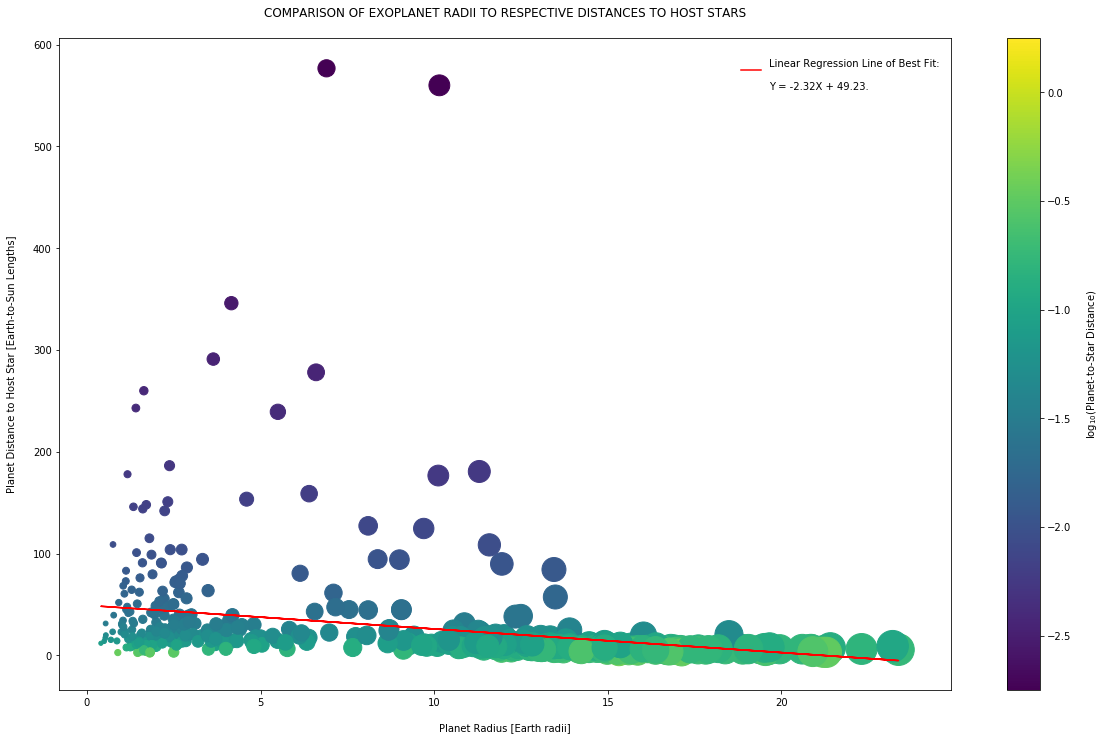

In [320]:
# Display scatter plot (X: Planet Radius, Y: Distance to Star)
X = dataset1['Planet Radius [Earth radii]']
Y = dataset1['Ratio of Distance to Stellar Radius']
Z = dataset1['Data Point Size']

plt.title('COMPARISON OF EXOPLANET RADII TO RESPECTIVE DISTANCES TO HOST STARS\n')
plt.xlabel('\nPlanet Radius [Earth radii]')
plt.ylabel('Planet Distance to Host Star [Earth-to-Sun Lengths]\n')

fitness = np.polyfit(X, Y, deg=1)
m = fitness[0]
b = fitness[1]
Y_hat = (m * X) + b
print(np.var(Y_hat))
Y_hat_label = 'Y = {}X + {}.'.format(round(m, 2), round(b, 2))
# print('\n\nRegression line of best fit is: Y =', round(m, 2), 'X +', round(b, 2), '\n\n')
plt.plot(X, Y_hat, color='red', label='\nLinear Regression Line of Best Fit: \n\n{}'.format(Y_hat_label))
plt.scatter(X, Y, s=Z, label=None, c=-np.log10(Y), cmap='viridis')
plt.colorbar(label='\nlog$_{10}$(Planet-to-Star Distance)')
plt.clim(-2.75, 0.25)
plt.legend(frameon=False, loc='upper right')

# Get figure size and set height to 12 and width to 20
fig_size = plt.rcParams['figure.figsize']
fig_size
fig_size[0] = 20    # width
fig_size[1] = 12    # height
plt.rcParams['figure.figsize'] = fig_size

In [281]:
# Grab samples from dataset.
def get_sample(data, n=30):
    """Grabs a random subsample of size 'n' from dataset.
    Outputs the mean of the subsample."""
    sample = np.random.choice(data, size=n)
    return np.mean(sample)

def create_sample_distribution(dataset, size=100, n=30):
    """Creates a dataset of subsample means.  The length of the dataset is specified by the 'size' 
    keyword argument. Should return the entire sample distribution as a numpy array.  """
    sample_averages = np.array([])
    for i in range(0, size):
        average = get_sample(dataset, n)
        sample_averages = np.append(sample_averages, average)   
    return sample_averages

# Define null and alternative hypotheses for planetary radius distribution analysis.

- Ho:    Most planets (=<50%) are not bigger than Earth.
- Ha:    Most planets (>50%) are bigger than Earth.

In [282]:
# Get filtered dataset
q1 = df_planet_radius_estimate.describe().iloc[4, 0]
q3 = df_planet_radius_estimate.describe().iloc[6, 0]
iqr = q3 - q1
f = iqr * 1.5
lower_fence = round(q1 - f, 2)
upper_fence = round(q3 + f, 2)

df_planet_radii_filtered = df_planet_radius_estimate[(df_planet_radius_estimate['Planet Radius [Earth radii]'] >= lower_fence) & (df_planet_radius_estimate['Planet Radius [Earth radii]'] <= upper_fence)]
df_planet_radii_filtered.describe()
data_rads = df_planet_radii_filtered['Planet Radius [Earth radii]']

In [306]:
# Set sample distribution size to be 30% of the population size
radii_sample_dist = create_sample_distribution(data_rads, int(0.3*len(df_planet_radii_filtered)), 50)

(0, 200)

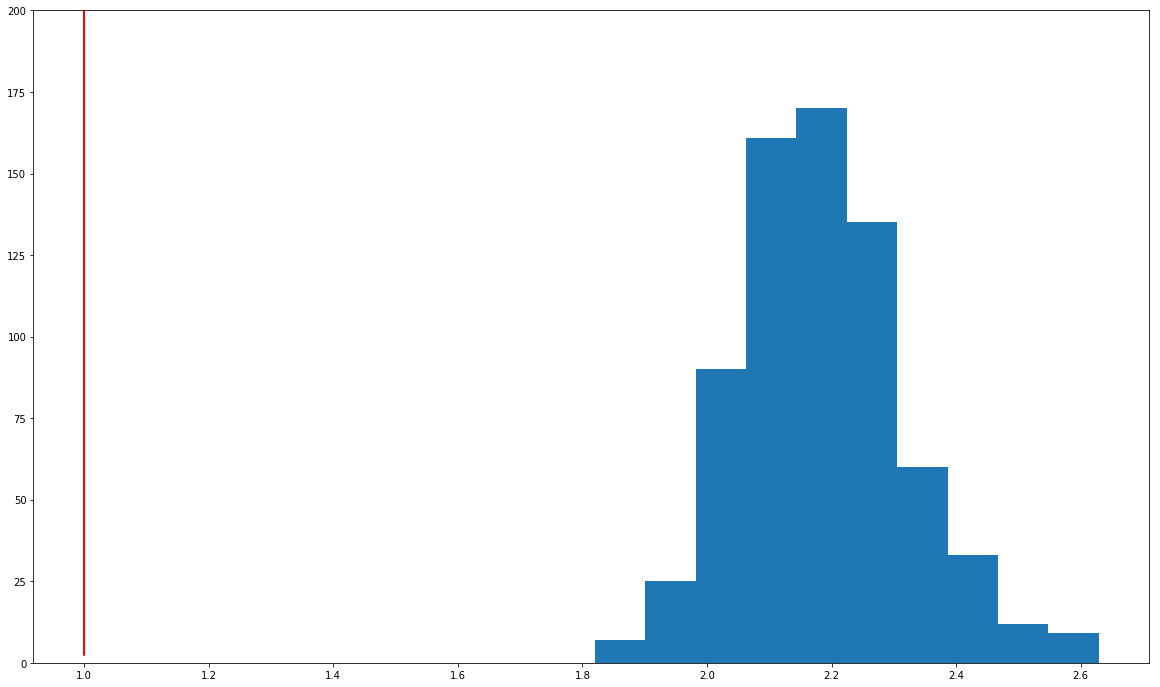

In [335]:
plt.hist(radii_sample_dist)
plt.plot(0 * Y + 1, Y, c='r')
plt.ylim(0,200)

# Define null and alternative hypotheses for planet-to-star-distance distribution analysis.

- Ho:    Most planets (=<50%) are not further from their host stars as the Earth is to the Sun.
- Ha:    Most planets (>50%) are further from their host stars as the Earth is to the Sun.

In [300]:
# Get filtered dataset
q1 = df_planet_star_distance_estimate.describe().iloc[4, 0]
q3 = df_planet_star_distance_estimate.describe().iloc[6, 0]
iqr = q3 - q1
f = iqr * 1.5
lower_fence = round(q1 - f, 2)
upper_fence = round(q3 + f, 2)

df_planet_star_dists_filtered = df_planet_star_distance_estimate[(df_planet_star_distance_estimate['Ratio of Distance to Stellar Radius'] >= lower_fence) & (df_planet_star_distance_estimate['Ratio of Distance to Stellar Radius'] <= upper_fence)]
df_planet_star_dists_filtered.describe()
data_stars = df_planet_star_dists_filtered['Ratio of Distance to Stellar Radius']

In [307]:
# Set sample distribution size to be 30% of the population size
stars_sample_dist = create_sample_distribution(data_stars, int(0.3*len(df_planet_star_dists_filtered)), 50)

(0, 35)

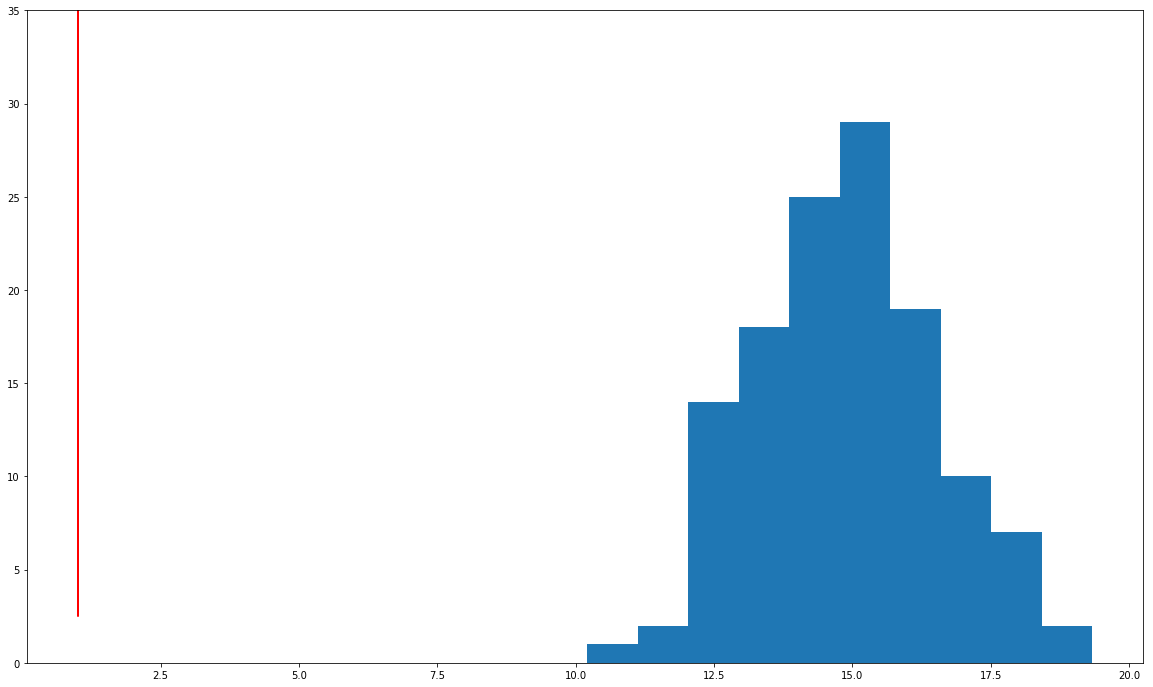

In [338]:
plt.hist(stars_sample_dist)
plt.plot(0 * Y + 1, Y, c='r')
plt.ylim(0,35)

Text(0,0.5,'Frequency\n')

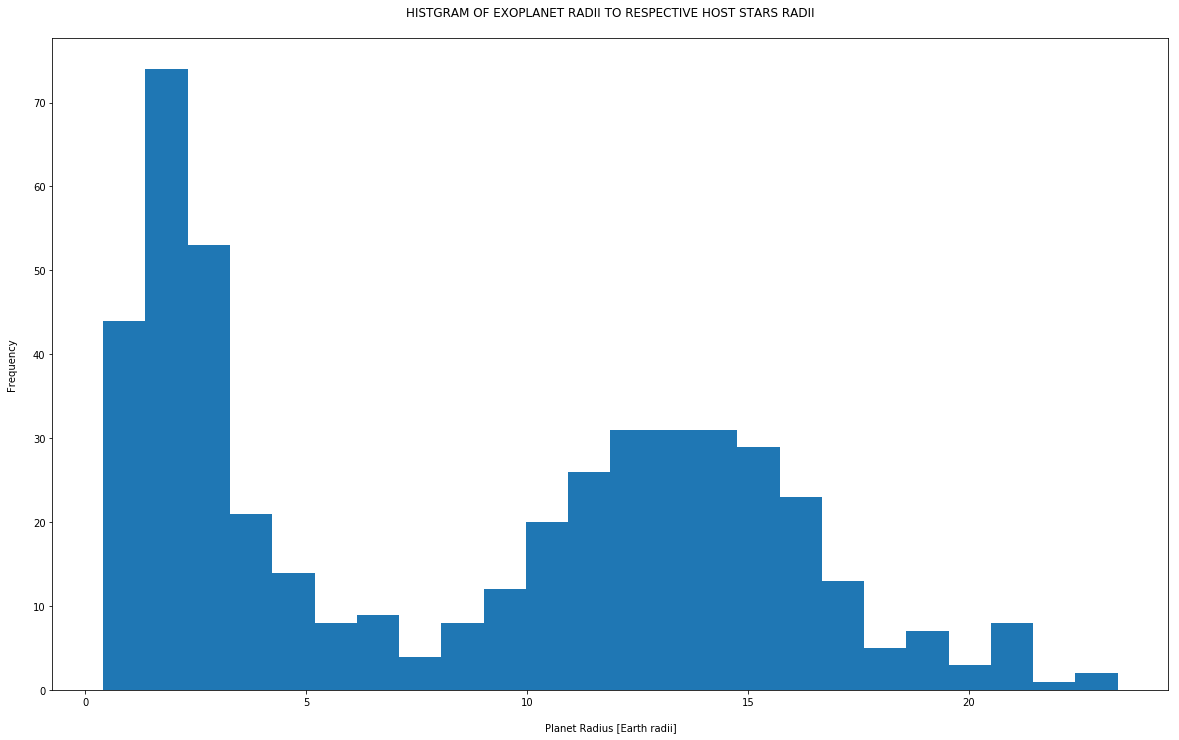

In [130]:
plt.hist(X, 24)
plt.title('HISTGRAM OF EXOPLANET RADII TO RESPECTIVE HOST STARS RADII\n')
plt.xlabel('\nPlanet Radius [Earth radii]')
plt.ylabel('Frequency\n')

Text(0,0.5,'Frequency\n')

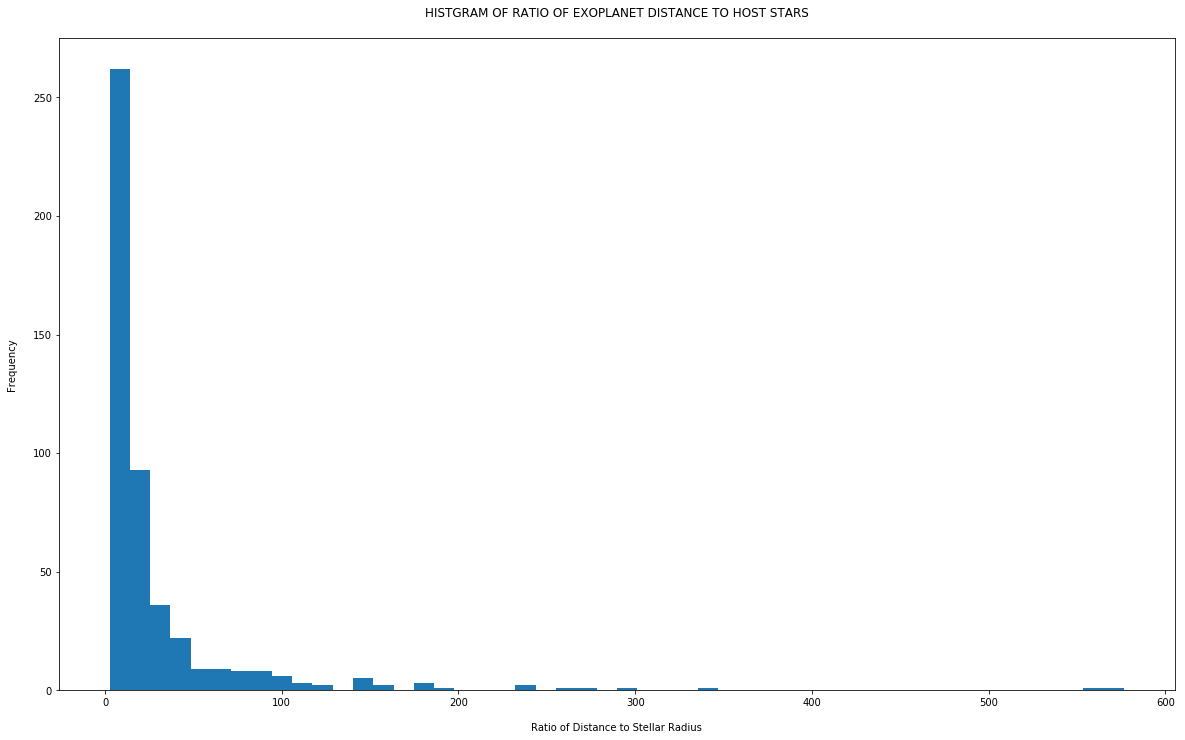

In [131]:
plt.hist(Y, 50)
plt.title('HISTGRAM OF RATIO OF EXOPLANET DISTANCE TO HOST STARS\n')
plt.xlabel('\nRatio of Distance to Stellar Radius')
plt.ylabel('Frequency\n')

## Second Analysis: Relationship between host star radius and planets radius

In [132]:
df_Stellar_Radius = df_planets_clean[df_planets_clean['Stellar Radius [Solar radii]'].notnull()][['Stellar Radius [Solar radii]', 'Host Name']]

In [133]:
dataset2 = pd.concat([df_planet_radius_estimate, df_Stellar_Radius], axis=1, join='inner')
dataset2['Data Point Size'] = round(1000 * (dataset2['Planet Radius [Earth radii]'] / dataset2['Planet Radius [Earth radii]'].max()), 2)
dataset2.describe()

,Planet Radius [Earth radii],Stellar Radius [Solar radii],Data Point Size
count,2808.000000,2808.000000,2808.000000
mean,3.978175,1.023743,169.789829
std,4.343391,0.405042,185.377412
min,0.320000,0.090000,13.660000
25%,1.550000,0.800000,66.150000
50%,2.300000,0.950000,98.160000
75%,3.400000,1.180000,145.110000
max,23.430000,6.300000,1000.000000


0.019970297688079685


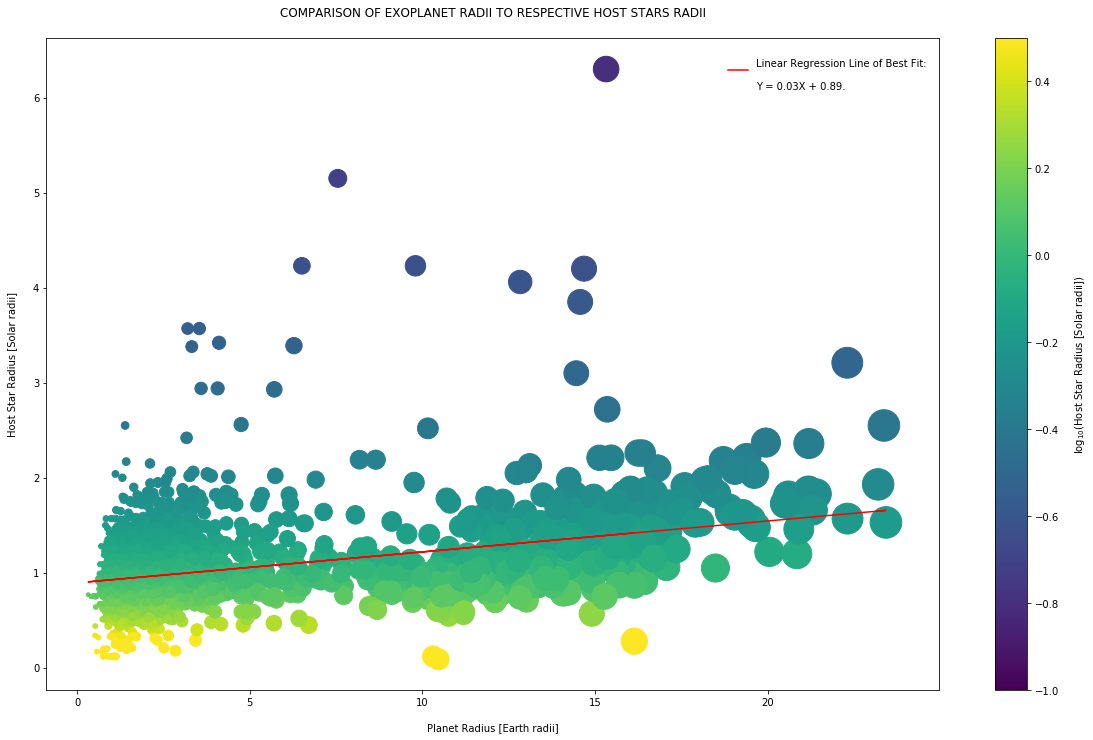

In [144]:
# Display scatter plot (X: Planet Radius, Y: Distance to Star)
X = dataset2['Planet Radius [Earth radii]']
Y = dataset2['Stellar Radius [Solar radii]']
Z = dataset2['Data Point Size']

plt.title('COMPARISON OF EXOPLANET RADII TO RESPECTIVE HOST STARS RADII\n')
plt.xlabel('\nPlanet Radius [Earth radii]')
plt.ylabel('Host Star Radius [Solar radii]\n')

fitness = np.polyfit(X, Y, deg=1)
m = fitness[0]
b = fitness[1]
Y_hat = (m * X) + b
print(np.var(Y_hat))
Y_hat_label = 'Y = {}X + {}.'.format(round(m, 2), round(b, 2))
# print('\n\nRegression line of best fit is: Y =', round(m, 2), 'X +', round(b, 2), '\n\n')
plt.plot(X, Y_hat, color='red', label='\nLinear Regression Line of Best Fit: \n\n{}'.format(Y_hat_label))
plt.scatter(X, Y, s=Z, label=None, c=-np.log10(Y), cmap='viridis')
plt.colorbar(label='\nlog$_{10}$(Host Star Radius [Solar radii])')
plt.clim(-1.0, 0.5)
plt.legend(frameon=False, loc='upper right')

# Get figure size and set height to 12 and width to 20
fig_size = plt.rcParams['figure.figsize']
fig_size
fig_size[0] = 20    # width
fig_size[1] = 12    # height
plt.rcParams['figure.figsize'] = fig_size

Text(0,0.5,'Frequency\n')

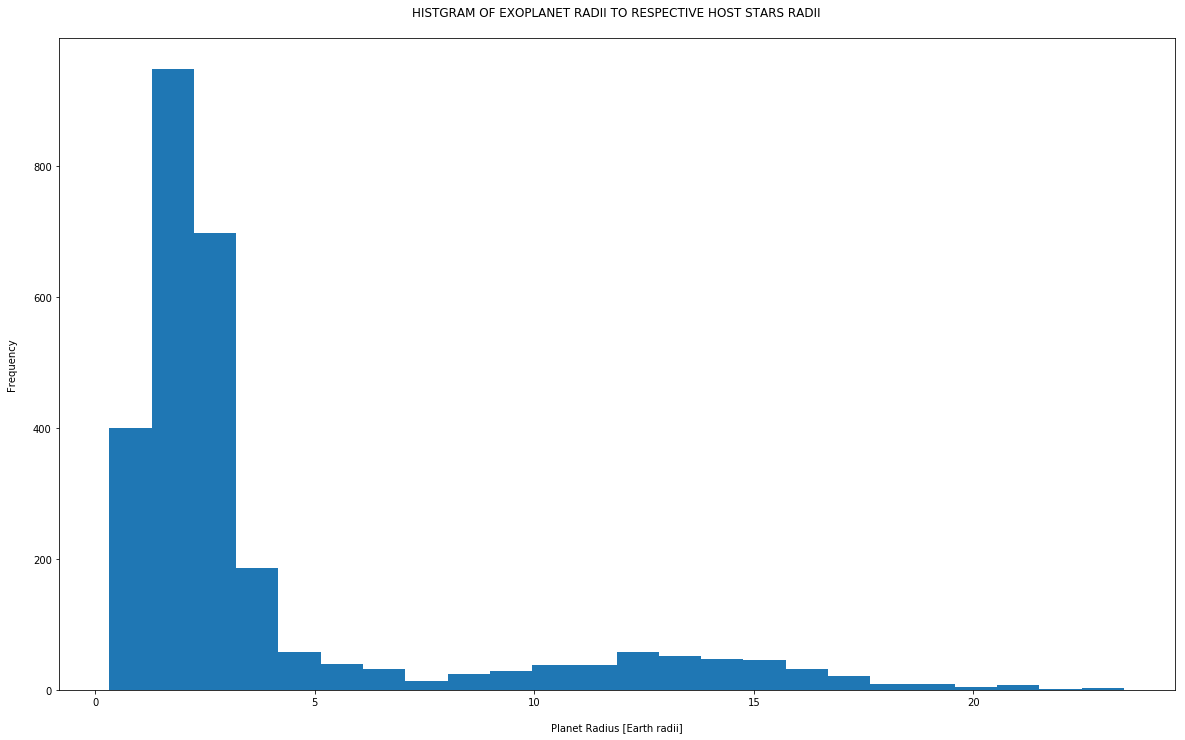

In [135]:
plt.hist(X, 24)
plt.title('HISTGRAM OF EXOPLANET RADII TO RESPECTIVE HOST STARS RADII\n')
plt.xlabel('\nPlanet Radius [Earth radii]')
plt.ylabel('Frequency\n')

In [136]:
df_Stellar_Radius_clean = df_Stellar_Radius.groupby(['Host Name']).first().reset_index()

Text(0,0.5,'Frequency\n')

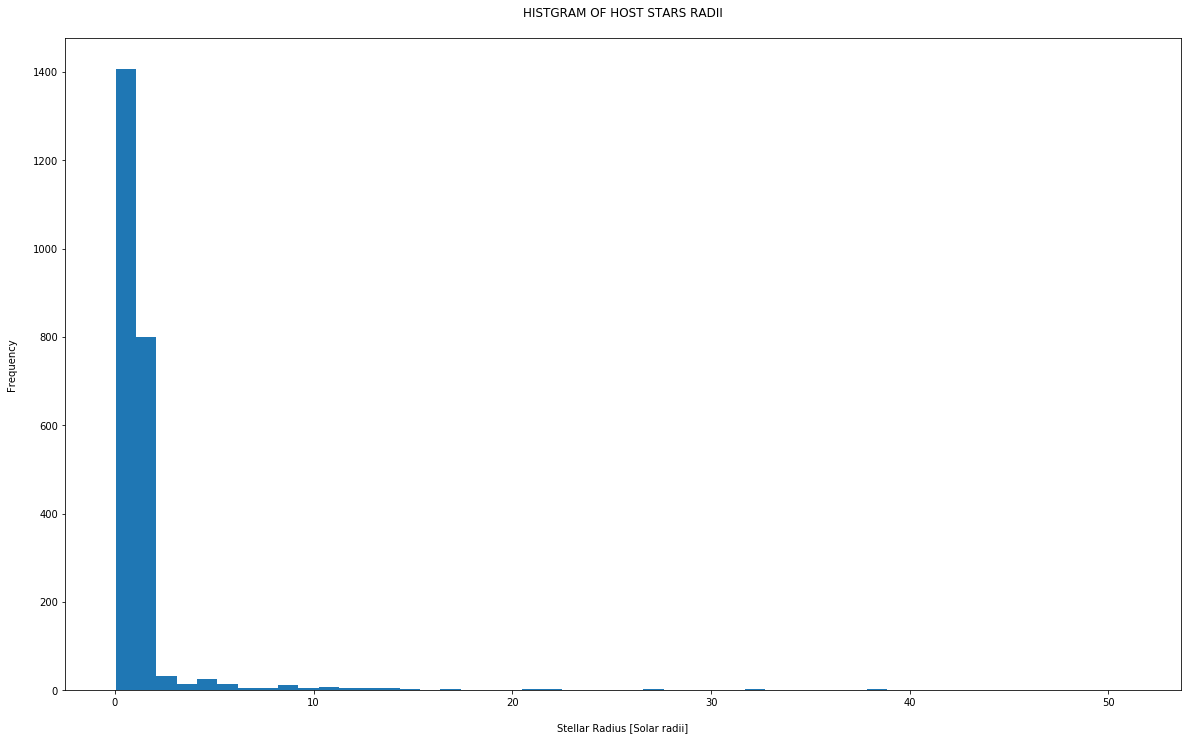

In [137]:
plt.hist(df_Stellar_Radius_clean['Stellar Radius [Solar radii]'], 50)
plt.title('HISTGRAM OF HOST STARS RADII\n')
plt.xlabel('\nStellar Radius [Solar radii]')
plt.ylabel('Frequency\n')

## Third Analysis: Planet Mapping Based on Similarity to Earth

In [138]:
df_planet_masses_ranged = df_planets_clean[["Planet Mass or M*sin(i) [Earth mass]", "Planet Mass or M*sin(i) Upper Unc. [Earth mass]", "Planet Mass or M*sin(i) Lower Unc. [Earth mass]"]]
# df_planet_masses_simple = df_planets_clean[["Planet Mass or M*sin(i) [Earth mass]"]]
df_planet_masses_ranged_cleaned = df_planet_masses_ranged[df_planet_masses_ranged["Planet Mass or M*sin(i) Lower Unc. [Earth mass]"].notnull()]
df_planet_masses_simple_cleaned = df_planet_masses_ranged_cleaned[["Planet Mass or M*sin(i) [Earth mass]"]]

# df_planet_masses_ranged_cleaned    # We need this to visualize planets with 
# df_planet_masses_simple_cleaned    # We need this to find planets like Earth (second analysis)

In [139]:
# join mass data
df_Radius_Disrance = dataset1.drop("Data Point Size", 1)
df_M_R_D = pd.concat([df_planet_Radius_Disrance, df_planet_masses_simple_cleaned], axis=1, join='inner')

In [145]:
# clean data of temperature of the star
df_star_temp = df_planets_clean[["Effective Temperature [K]", "Host Name"]]
df_star_temp_clean = df_star_temp[df_star_temp['Effective Temperature [K]'].notnull()]
df_star_temp_clean = df_star_temp_clean.rename(columns = {"Effective Temperature [K]": "Temperature of the star [K]"})

In [146]:
# join temperature of the star *the temperature of the sun is 5778 [K]
df_M_R_D_ST = pd.concat([df_M_R_D, df_star_temp_clean], axis=1, join='inner')
df_M_R_D_ST.describe()

,Planet Radius [Earth radii],Ratio of Distance to Stellar Radius,Planet Mass or M*sin(i) [Earth mass],Temperature of the star [K]
count,297.000000,297.000000,297.000000,297.000000
mean,11.671859,15.196691,409.591848,5670.060606
std,5.145316,18.377043,711.838158,787.886158
min,0.772000,2.496000,0.410000,2559.000000
25%,9.640000,6.280000,85.810000,5380.000000
50%,12.733000,8.870000,242.176000,5754.000000
75%,14.986000,15.152000,435.410000,6090.000000
max,23.371000,124.700000,6883.910000,10170.000000


In [142]:
df_like_earth = df_M_R_D_ST[(df_M_R_D_ST['Planet Mass or M*sin(i) [Earth mass]']<2) & (df_M_R_D_ST['Planet Radius [Earth radii]']<2)]
df_like_earth

,Planet Radius [Earth radii],Ratio of Distance to Stellar Radius,Planet Mass or M*sin(i) [Earth mass],Temperature of the star [K]
1108,1.800,18.55,1.90,5663.0
3379,1.086,20.50,0.85,2559.0
3380,1.056,28.08,1.38,2559.0
3381,0.772,39.55,0.41,2559.0
3382,0.918,51.97,0.62,2559.0
3383,1.045,68.40,0.68,2559.0
3384,1.127,83.20,1.34,2559.0


# TODO

## First Analysis:
- <del>Find and clean separate dataframes for Star Distance and Planet Radius
- Align and join dataframes for Star Distance and Planet Radius
- Filter outliers using 1.5x method
- Visualization via Scatterplot (As they increase in Planet Radius value, they increase in visual size)
- [STRETCH] Find approximate line of regression (MatPlotLib and SciPy)

## Second Analysis:
- Create list of label vectors for Earth similarity
- Find, clean, align, and join dataframes for all planets having values for similarity vectors
- Filter outliers using 1.5x method
- Sample X amount of planets from joined data population
- Check for similarity to Earth (does the value ranges cross or fall within ranges)
- [SUPER STRETCH] Use kNN to approximate similarity between 